In [1]:
from astropy.timeseries import LombScargle
from astropy import units as un
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/sksolartimevariation5804d.txt', skiprows=13, sep='\s+', names=['t_mean(s)', 't_mean-t_start(s)', 't_end-t_mean(s)', 'nu_flux(1e6cm-2s-1)', 'flux_up_error(1e6cm-2s-1)', 'flux_down_error(1e6cm-2s-1)'])

In [3]:
data

,t_mean(s),t_mean-t_start(s),t_end-t_mean(s),nu_flux(1e6cm-2s-1),flux_up_error(1e6cm-2s-1),flux_down_error(1e6cm-2s-1)
0,833654760,170100,277380,2.74,0.63,0.53
1,834127080,175500,210060,2.83,0.75,0.62
2,834550800,213180,230160,2.30,0.53,0.45
3,834997020,199380,212640,1.79,0.55,0.44
4,835380420,170520,265680,3.15,0.74,0.61
...,...,...,...,...,...,...
1338,1525315550,172739,172774,2.36,0.36,0.33
1339,1525703838,215064,215054,2.26,0.31,0.29
1340,1526138206,216970,216028,1.88,0.33,0.29
1341,1526588224,232102,226109,1.90,0.38,0.28


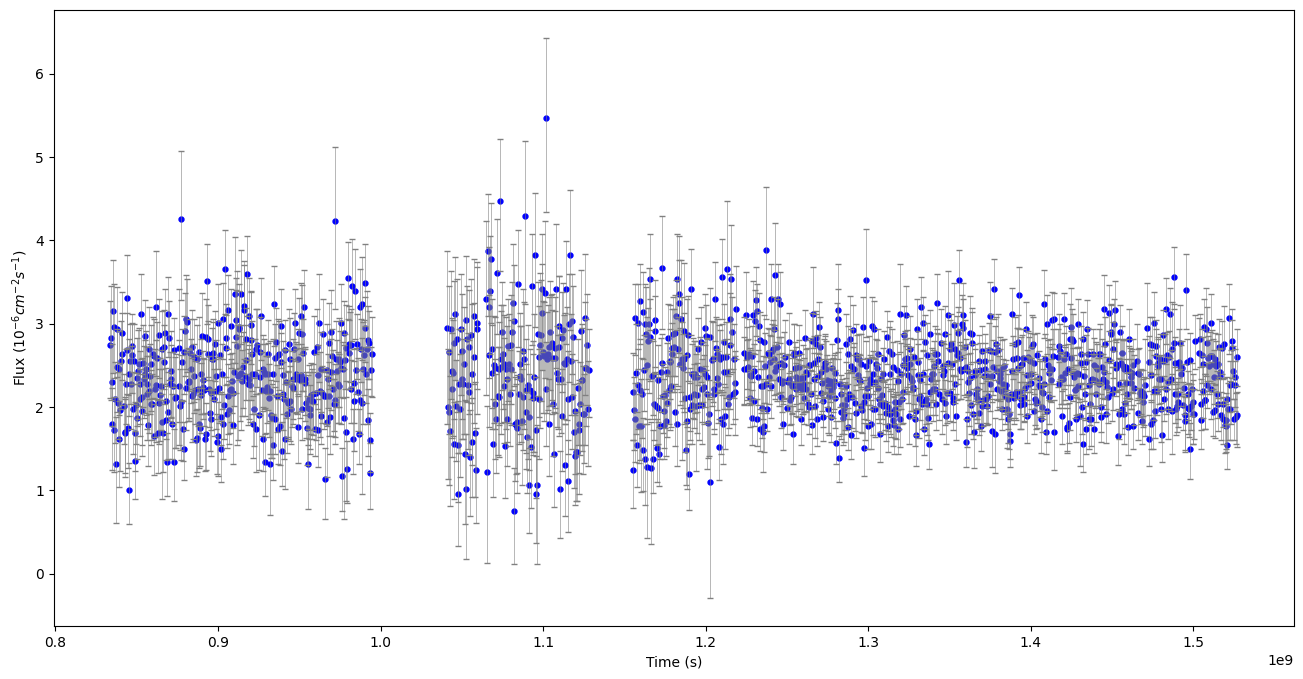

In [4]:
plt.figure(figsize=(16, 8))


plt.errorbar(data['t_mean(s)'], data['nu_flux(1e6cm-2s-1)'], yerr=np.array(list(zip(data['flux_up_error(1e6cm-2s-1)'].values, data['flux_down_error(1e6cm-2s-1)'].values))).T, fmt='none', ecolor='gray', elinewidth=0.4, capsize=2)
# plt.hlines([data['nu_flux(1e6cm-2s-1)'].mean(), data['nu_flux(1e6cm-2s-1)'].mean() + data['nu_flux(1e6cm-2s-1)'].std(), data['nu_flux(1e6cm-2s-1)'].mean() - data['nu_flux(1e6cm-2s-1)'].std()], xmin=data['t_mean(s)'].min(), xmax=max(data['t_mean(s)']), color='red', linestyles='dashed', label='mean flux')
plt.scatter(data['t_mean(s)'], data['nu_flux(1e6cm-2s-1)'], color='blue', marker='.', s=50)
plt.xlabel('Time (s)')
plt.ylabel('Flux ($10^{-6}cm^{-2}s^{-1}$)')
plt.show()

In [5]:
data['t_mean(s)'] = data['t_mean(s)'] * un.s
data['t_mean-t_start(s)'] = data['t_mean-t_start(s)'] * un.s
data['t_end-t_mean(s)'] = data['t_end-t_mean(s)'] * un.s
data['nu_flux(1e6cm-2s-1)'] = data['nu_flux(1e6cm-2s-1)'] * 1e6 * un.cm**-2 * un.s**-1
data['flux_up_error(1e6cm-2s-1)'] = data['flux_up_error(1e6cm-2s-1)'] * 1e6 * un.cm**-2 * un.s**-1
data['flux_down_error(1e6cm-2s-1)'] = data['flux_down_error(1e6cm-2s-1)'] * 1e6 * un.cm**-2 * un.s**-1

In [6]:
lsp = LombScargle(data['t_mean(s)'].values, data['nu_flux(1e6cm-2s-1)'].values, (data['flux_up_error(1e6cm-2s-1)'].values + data['flux_down_error(1e6cm-2s-1)'].values)/2)
# freql, powerl = lsp.autopower()


In [7]:
# plt.figure(figsize=(18, 8))
# plt.plot(freql, powerl, color='blue', ls='-')
# plt.xlabel('Frequency ($s^{-1}$)')
# plt.ylabel('Power')
# plt.show()

In [8]:
data['t_mean(s)'].max() - data['t_mean(s)'].min()

<Quantity 6.93360015e+08 s>

In [9]:
median_bin_width = abs((data['t_end-t_mean(s)'] - data['t_mean-t_start(s)'])/2).median()

In [46]:
1/median_bin_width..to(un.year**-1)to(un.year)

<Quantity 16875.72192513 1 / yr>

We cannot probe frequences higher than the bin width

In [11]:
# tot = data['t_mean(s)'].max() - data['t_mean(s)'].min()

# freq_res = 1/tot

# # freqs = np.linspace(0, (20/un.year).to(un.s**-1), int((20/un.year).to(un.s**-1)/freq_res))
# freqs = np.linspace(0, 20 / (3.156e7*un.s), int((20 / 3.156e7)/freq_res.value))
# power_max_bin = lsp.power(freqs)
# plt.figure(figsize=(18, 8))
# plt.plot(freqs.to(1/un.year), power_max_bin, color='blue', ls='-')
# plt.xlabel('Frequency ($year^{-1}$)')
# plt.ylabel('Power')
# # plt.xlim(0, 20)
# plt.show()

In [12]:
tot = data['t_mean(s)'].max() - data['t_mean(s)'].min() #Total Observation Time

freq_res = 1/tot

freqs = np.linspace(0, 20/un.year, int(20/freq_res.to(un.year**-1).value))
powers = lsp.power(freqs.to(un.s**-1), )

/home/darkwake/.local/lib/python3.10/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:102: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


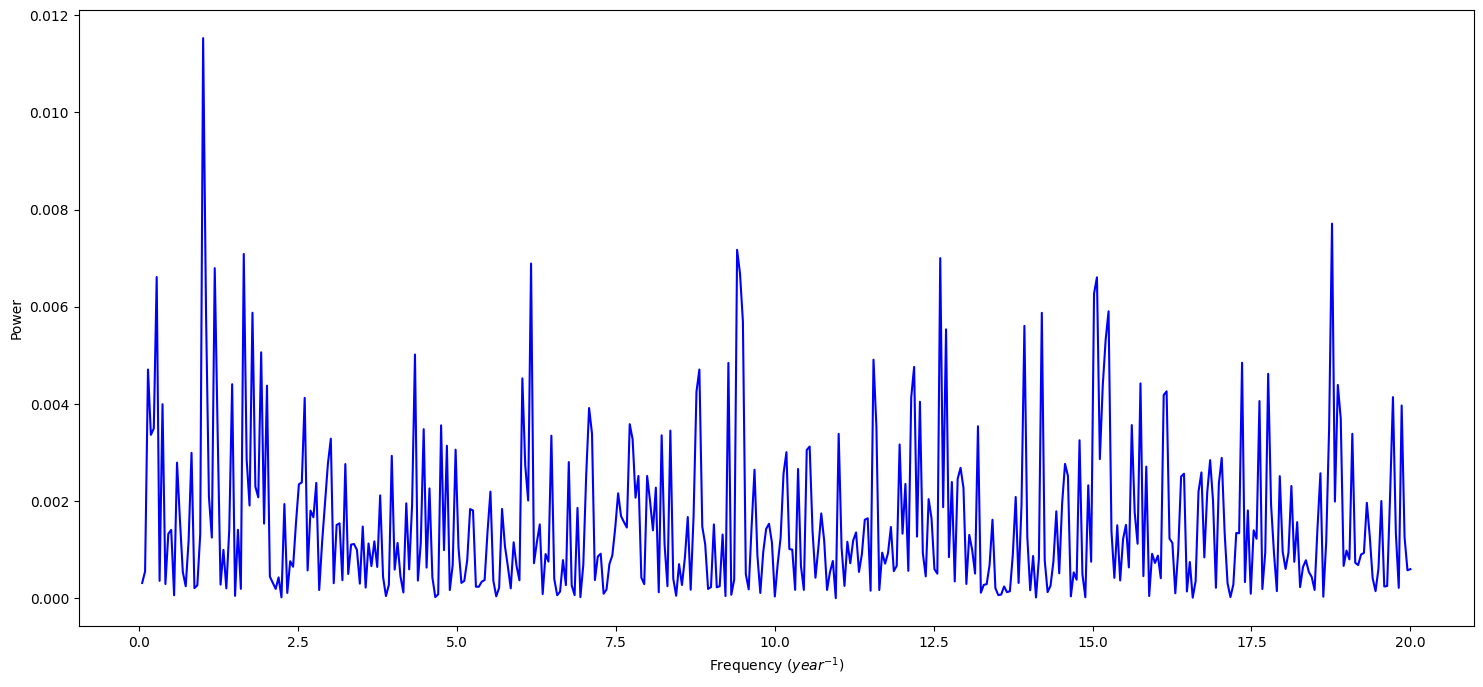

In [13]:
plt.figure(figsize=(18, 8))
plt.plot(freqs.to(un.year**-1), powers, color='blue', ls='-')
plt.xlabel('Frequency ($year^{-1}$)')
plt.ylabel('Power')
# plt.xlim(0, 20)
plt.show()

#### Closest frequency to 9.43/year

In [14]:
freqs[np.argmin(abs(freqs - 9.43/un.year))]

<Quantity 9.45205479 1 / yr>

In [15]:
powers[np.argmin(abs(freqs - 9.43/un.year))]

<Quantity 0.00668501>

In [16]:
lsp.power(freqs[np.argmin(abs(freqs - 9.43/un.year))])

<Quantity 0.00668182>

In [17]:
lsp.false_alarm_probability(lsp.power(freqs[np.argmin(abs(freqs - 9.43/un.year))]))

<Quantity 1.>

In [18]:
lsp.false_alarm_probability(powers[np.argmin(abs(freqs - 9.43/un.year))], method="baluev")

<Quantity 1.>

In [19]:
lsp.false_alarm_probability(powers[np.argmin(abs(freqs - 9.43/un.year))], method="davies")

<Quantity 80.69706551>

In [20]:
lsp.false_alarm_probability(powers[np.argmin(abs(freqs - 9.43/un.year))], method="naive")

<Quantity 1.>

In [21]:
lsp.false_alarm_probability(powers[np.argmin(abs(freqs - 9.43/un.year))], method="bootstrap")

1.0

In [33]:
lsp.false_alarm_probability(powers.max(), method="baluev")

<Quantity nan>

In [34]:
lsp.false_alarm_probability(powers.max(), method="naive")

<Quantity nan>

/home/darkwake/.local/lib/python3.10/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:102: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


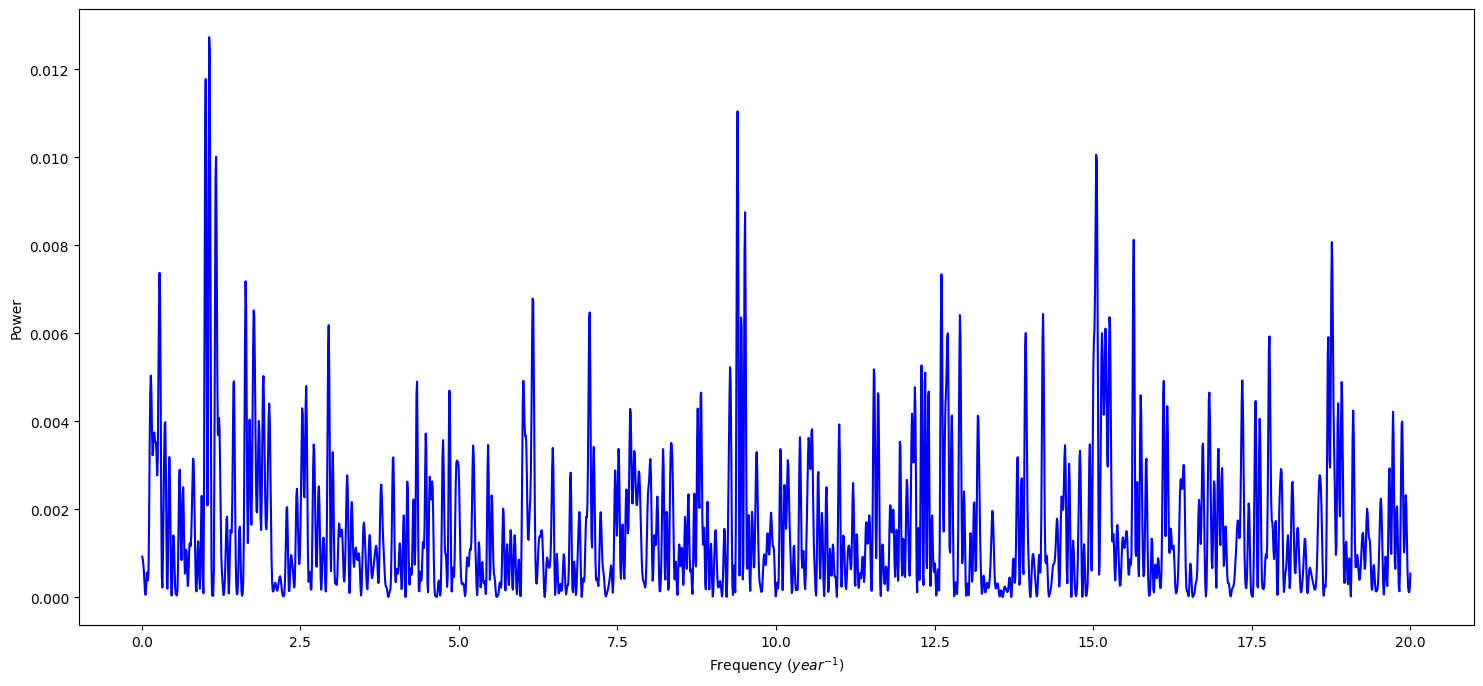

In [39]:
freq2, power2 = lsp.autopower(minimum_frequency=0/un.year.to(un.year**-1), maximum_frequency=20/un.year)
plt.figure(figsize=(18, 8))
plt.plot(freq2.to(un.year**-1), power2, color='blue', ls='-')
plt.xlabel('Frequency ($year^{-1}$)')
plt.ylabel('Power')
# plt.xlim(0, 20)
plt.show()

In [41]:
lsp.false_alarm_probability(power2[np.argmin(abs(freq2.to(1/un.year) - 9.43/un.year))], method="bootstrap")

1.0

In [42]:
lsp.false_alarm_probability(power2[np.argmin(abs(freq2.to(1/un.year) - 9.43/un.year))], method="davies")

<Quantity 1414.33049458>

In [43]:
lsp.false_alarm_probability(power2[np.argmin(abs(freq2.to(1/un.year) - 9.43/un.year))], method="naive")

<Quantity 1.>

In [44]:
lsp.false_alarm_probability(power2[np.argmin(abs(freq2.to(1/un.year) - 9.43/un.year))], method="baluev")

<Quantity 1.>